# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

# How will Houston Data Science cover the course?
The Stanford online course covers the entire book in 9 weeks and with the R programming language. The pace that we cover the book is yet to be determined as there are many unknown variables such as interest from members, availability of a venue and general level of skills of those participating. That said, a meeting once per week to discuss the current chapter or previous chapter solutions is the target.


# Python in place of R
Although R is a fantastic programming language and is the language that all the ISLR labs are written in, the Python programming language, except for rare exceptions, contains analgous libraries that contain the same statistical functionality as those in R.

# Notes, Exercises and Programming Assignments all in the Jupyter Notebok
ISLR has both end of chapter problems and programming assignments. All chapter problems and programming assignments will be answered in the notebook.

# Replicating Plots
The plots in ISLR are created in R. Many of them will be replicated here in the notebook when they appear in the text

# Book Data
The data from the books was downloaded using R. All the datasets are found in either the MASS or ISLR packages. They are now in the data directory. See below

In [5]:
!ls data

Advertising.csv college.csv     khan_xtrain.csv nci60_labs.csv  wage.csv
auto.csv        default.csv     khan_ytest.csv  portfolio.csv   weekly.csv
boston.csv      hitters.csv     khan_ytrain.csv smarket.csv
caravan.csv     khan_xtest.csv  nci60_data.csv  usarrests.csv


# Youtube videos in the notebook
If you don't feel like going to Stanford Online to watch the videos, you don't have to as all the Youtube videos can be embedded thanks to the Youtube iPython widget in the notebook.

In [1]:
from IPython.display import YouTubeVideo

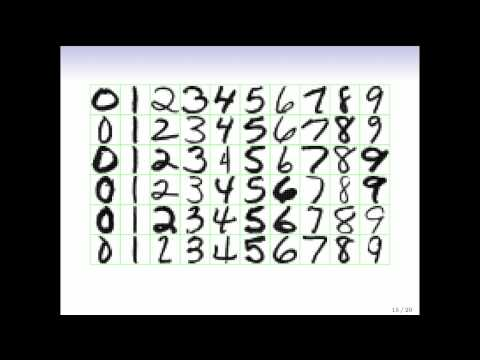

In [2]:
YouTubeVideo("2wLfFB_6SKI")

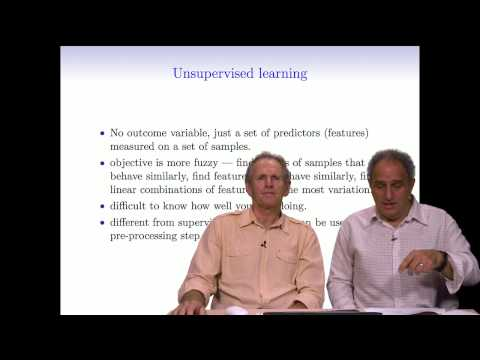

In [3]:
YouTubeVideo("LvaTokhYnDw")

# How to get the most out of the class
Simple, watch the videos and read the chapter before the start of each class and then finish all the assignments at home.

# ISLR Chapter 1
Chapter 1 is short and introduces some of the data, definitions on what is statistical learning, notation and book organization.

**Statistical learning** - understanding data

Two sets of tools  
**Supervised** - Model built to predict an output from a set of inputs  
**Unsupervised** - Learn underlying structure of data

# Wage data introduced
Page 2

In [1]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wage = pd.read_csv('data/wage.csv')

In [3]:
df_wage = df_wage.drop(df_wage.columns[0], axis=1)

In [4]:
df_wage.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [10]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.3+ KB


In [11]:
df_wage.describe(include=['O'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [12]:
# Look at all available plotting styles
plt.style.available

['seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-deep',
 'classic',
 'seaborn-muted',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-notebook',
 'bmh',
 'seaborn-talk',
 'seaborn-white',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-colorblind',
 'ggplot',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'grayscale']

In [26]:
plt.style.use("ggplot")

In [28]:
# need to reshape data to plot correctly
df_edu = df_wage.pivot(columns='education', values='wage')

In [29]:
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


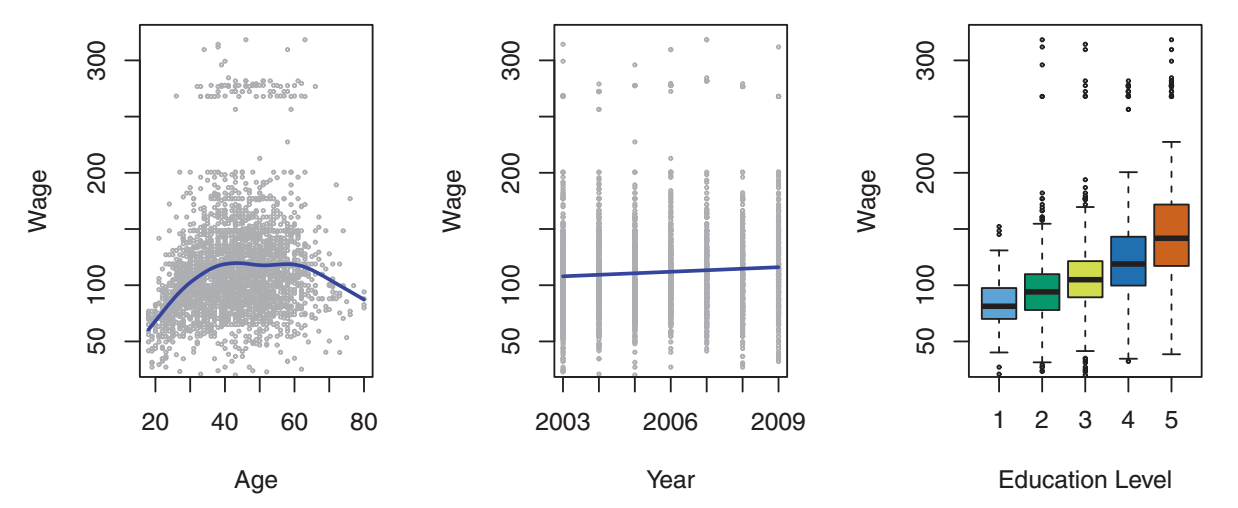

In [57]:
# Image from ISLR
from IPython.display import Image
Image('../images/ch1_pg2.png')

# Replicate with matplotlib
Use statsmodels to fit lowess curve in first plot

In [139]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

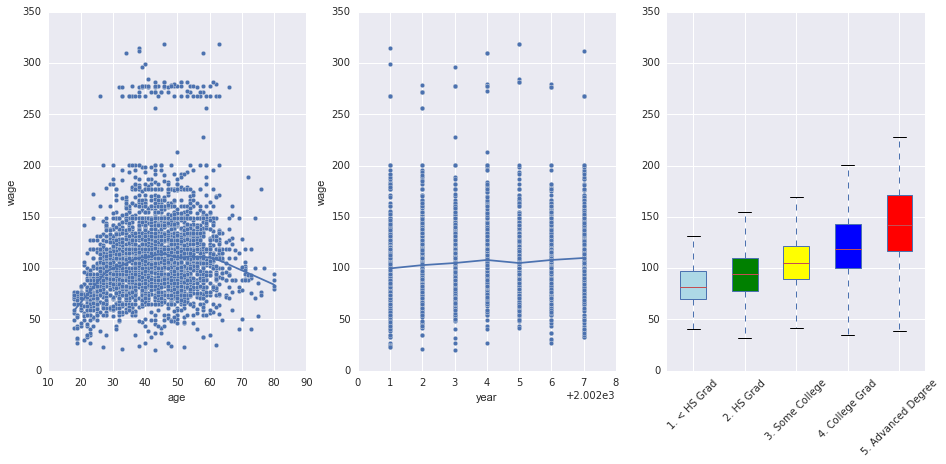

In [141]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
df_wage.plot.scatter('age', 'wage', ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)

boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

# Seaborn for easy, beutiful plotting
[Check their intro page on how to use it](https://web.stanford.edu/~mwaskom/software/seaborn/)

In [142]:
import seaborn as sns

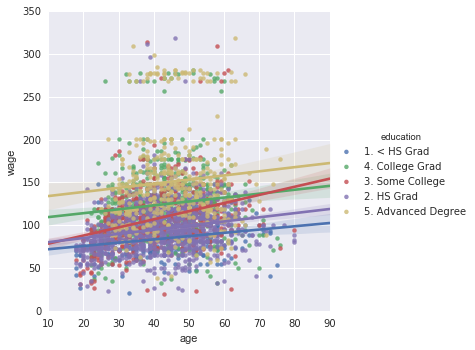

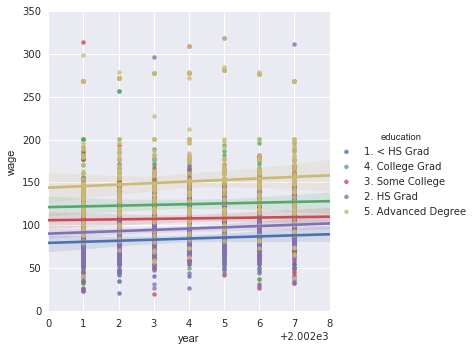

In [281]:
# Similar plots to those above
sns.lmplot('age', 'wage', data=df_wage, hue='education')
sns.lmplot('year', 'wage', data=df_wage, ci=99.99, hue='education');

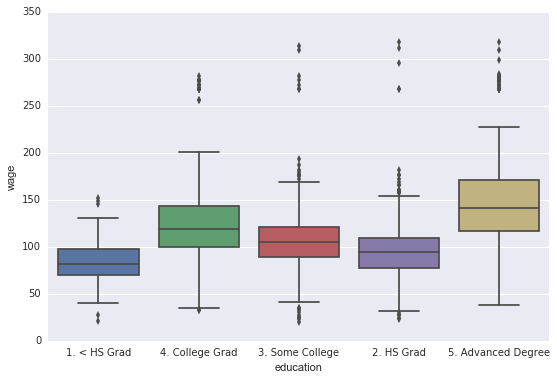

In [280]:
sns.boxplot('education', 'wage', data=df_wage);

In [282]:
df1 = df_wage[['age', 'year', 'education', 'wage']]

In [283]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [284]:
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


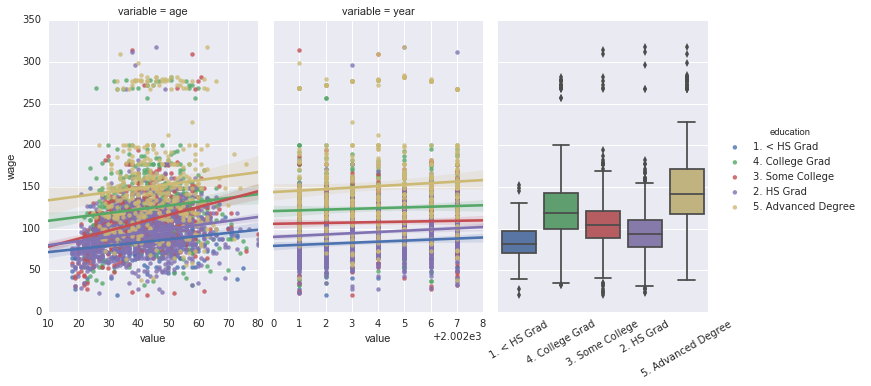

In [356]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)
left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))
sns.boxplot('education', 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

In [20]:
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [21]:
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')

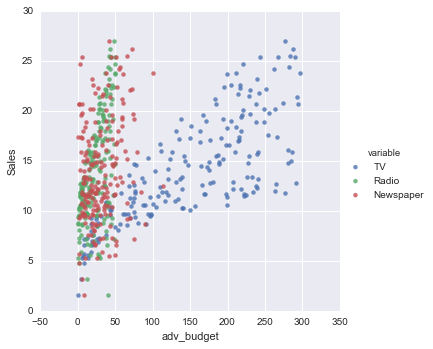

In [22]:
sns.lmplot('adv_budget', 'Sales', data=df_adv_new, hue='variable', fit_reg=False);

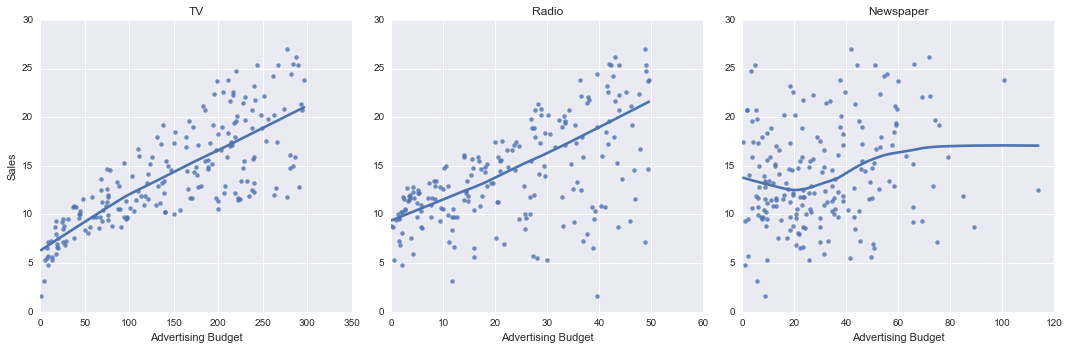

In [23]:
lm = sns.lmplot('adv_budget', 'Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')